# Modul-Importe

Zunächst importieren wir einige Module / Pakete, welche im Laufe dieses Notebooks genutzt werden sollen.

In [1]:
import os
import imageio
import numpy as np # eine effiziente und weit verbreitete numerik-bibliothek. Note here: "numpy" haben wir als "np" eingeführt damit wir weniger tippe müssen. np ist ein alias für numpy.
na = np.newaxis
import matplotlib.pyplot as plt

import modules  # ein paket mit neural-network bausteinen. siehe modules/ und inhalt
import model_io # ein modul zum speichern und laden von neuronalen netzwerken, die über modules definiert wurden.
from datasets import generate_dataset, data_eval # liefert funktionen zum generieren von beispieldatensätzen. siehe datasets.py

from IPython import display

# Datensätze erkunden

Das allererste, was man als Machine Learner tun sollte, bevor man die Problemösung angeht, ist die Daten zu untersuchen um diese zu verstehen. Nur so kann man mit dem durch die Inspektion erlangten Vorwissen bereits im Vorfeld einige Modelle und Methoden auswählen oder disqualifizieren. Wir haben im obigen code block die funktion `generate_dataset` aus dem modul `datasets.py` importiert, welche uns Zugriff zu einigen Methoden zum Erstellen von Beispieldatensätzen gewährt. Verschafft euch einen Überblick über die Signatur dieser methode und generiert einige Datensätze. 

Tipp: mit ein bis zwei Fragezeichen vor einem Funktionsnamen, zb `??generate_dataset`, kann man sich in JupyterLab die signatur, bzw den code der Methode ausgeben lassen.

generate_dataset gibt drei Werte zurück. Der Erste ist ein numpy array (ie eine Matrix, nennen wir sie mal `X`, oder technisch betrachtet eher verschachtelte Vektoren) welches sich über die funktion `print(X)` ausgeben lassen. `X.shape` und `X.size` liefern euch informationen über die Form Dimensionalität der Arrays. Unter der Annahme, dass wir es hier mit 2d-Daten zu tun haben, was könnt ihr über die Daten herausfinden?

In [2]:
dset_name = 'xor'
random_seed = 31413
X,Y, num_classes = generate_dataset(name=dset_name, random_seed=random_seed)
?generate_dataset

print(X.shape, Y.shape, num_classes)

(2000, 2) (2000, 2) 2


Signature: generate_dataset(name='xor', D=2, N=2000, random_seed=1234)
Docstring: <no docstring>
File:      ~/Desktop/sideprojects/schuelerpraktikum-2022/1_2d-ml/datasets.py
Type:      function


Nach einer sehr rudimentären Analyse der Daten wollen wir uns an deren Visualisierung wagen. Es macht immer Sinn, sich die (hier räumliche) Verteilung der Daten genauer anzusehen. Nutzt dazu die funktionen `plt.scatter` der Matplotlib-Bibliothek zum Zeichnen von Graphen und Daten(wolken). Nutzt die online verfügbare Dokumentation (oder fragt google mit menschenverständlichen Sätzen nach dem, was ihr erledigen wollt), um genauer zu spezifizieren, was ihr erledigen möchtet. Interessante stichworte, um auf gewisse Teile der Daten-Arrays zugreifen oder adressieren zu können sind "subscripting" oder "slicing". Weiterhin ist die Funktion `numpy.argmax` spannend für die Einfärbung der Datenpunkte nach Labelinformation. Sollte google, bzw die online-Dokumentation dieser Funktionien nicht helfen können, wendet euch an Sebastian.

Sobald ihr eine rudimentäre Visualisierung umgesetzt habt, erkundet die verschiedenen Datensätze, welche über `generate_dataset` zur Verfügung gestellt werden, und welchen einfluss die verschiedenen Parameter auf die Funktion haben.

Always remember: In ML and Data Science, visualization and understanding is key! We CAN run brute force e-to-end solutions, but usually efficiency will suffer...

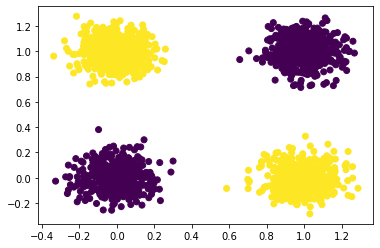

In [3]:
plt.scatter(X[:,0], X[:,1],c=np.argmax(Y, axis=1))

# Neuronale Netze (und andere Modelle) trainieren

das Modul `modules` bietet eine Reihe von Bausteinen von Neuronalen Netzen (NNs). Um code block unten habe ich beispielhaft eine funktion geschrieben, welche ein NN-Architektur aufgebaut. Der Aufbau ist Typischerweise ein `Sequential` (ein Block, welcher eine Sequenz von NN-Blöcken enthält die der Reihe nach ausgeführt werden), welcher eine Liste von linearen oder nichtlinearen Funktionsblöcken enthält. Ändert die Funktion nach belieben ab, erweitert sie, etc, um Laufe dieses notebooks.

Alternativ könnt ihr auch auf Modelle und Methoden aus der umfangreichen `sklearn`-Bibliothek zugreifen.

In [4]:
def build_network(n_classes):
    ##
    ## ANPASSBARE Netzarchitektur:
    ##
    #build a network. add/remove layers. change number of nodes. observe effect on training
    # dreifache anführungsstriche beginnen/beenden "block-kommentare"
    # modules.Linear(n_in, n_out), modules.Tanh, modules.Rect, modules.SoftMax
    
    # Feel free to extend this function to support more Network architectures or ML Methods from sklearn
    
    
    nn = modules.Sequential(
        [modules.Linear(2,30),
         modules.Tanh(),
         modules.Linear(30,150),
         modules.Tanh(),
         modules.Linear(150,150),
         modules.Tanh(),
         modules.Linear(150,n_classes),
         modules.SoftMax()
        ]
    )
    
    
    # ein lineares "netz" für den anfang
    #nn = modules.Sequential([modules.Linear(2,n_classes)])
    return nn

## Fundamentales NN-Training

Um NNs zu trainieren verwendet man in der Regel einen Algorithmus namens Stochastic Gradient Descent (SGD). Stochastisch bedeutet, dass hier immer anhand von wenigen aus dem Datensatz gezogener Beispiele Trainiert wird (ähnlich wie wir menschen lernen -- anhand einzelner Beispiele). Der Gradient Descent - Teil von SGD beschreibt die Optimierungsmethodik: Mit jeder während des Trainings ausgeführten Vorhersage wird ein Fehlersignal berechnet, welches als Gradient durch das Netzwerk zurückgeschickt wird und beschreibt, in welche Richtung die Parameter (ie die gelernten Gewichte) angepasst werden müssen um den Fehler zu minimieren.

Man kann sich das wie folgt vorstellen: Die Parameter des Netzes beschreiben einen Anzahl(Parameter)-Dimensionalen Raum, in dem sich das Modell (zb während der Optimierung) bewegen kann, während es eine Mathematische Funktion beschreibt, die von den Parametern abhängig ist. Im stochastischen lernprozess werden nun stichpunkthaft Fehlersignale dieser Funktion errechnet, welche ableitbar ist. Das Ziel ist es, den Fehler zu minimieren, dh die "Fehlerlandschaft" bergab in das niedrigste Tal zu rutschen. Diese bergab-Richtung gibt der Gradient vor.

In jedem Update-Schritt des Netzes  korrigieren wir also die Parameter mit zufällig gezogenen Daten ein kleines bisschen, bis wir so nahe am Optimum wie nur möglich angekommen sind. Der stochastische Lernprozess erlaubt es uns hier, mit beliebig großen Datenmengen und (fast) beliebig großen Modellparameterräumen umzugehen, weil wir immer eine Auswertung nach der anderen betrachten und mit baby steps in die (hoffentlich) richtige Richtung wandern.

Andere methoden, wie beispielsweise Support Vector Machines (SVMs) optimieren die Parameter mit der Lösug von Gleichungssystemen in geschlossener Form, was ein gleichzeitiges betrachten aller Parameter und Datenpunkte (in interaktion) erfordert, was oft rechnerisch bei gewissen Problemen an praktische und theoretische Grenzen stößt (jedoch vermutlich nicht hier in dieser 2d-Sandbox).

TL;DR: im Block unter diesem findet ihr den rudimentären Aufbau eines NN-Trainings-Algorithmus. Spielt mit der Modellarchitektur oben (gerne so extrem ihr wollt. Fangt mit einem einzelnen Linear(num_dims, num_classes) an!), sowie den Trainigsparametern unten, und beobachtet, wie gut sich das Netz auf die Trainingsdaten anpassen kann, indem ihr den Loss (ie den Prediktionsfehler) beobachtet.

Wichtig: Damit aus dem ganzen Prozess Wissenschaft wird, dokumentiert bitte eure Beobachtungen, und Hypothesen.

In [5]:
##
## ANPASSBARE PARAMETER:
##
datensatz = 'xor' # 'three',  'four', 'xor', 'circles', 'moons' # Verfügbare Datensätze
#experiment_name = datensatz + '_' + '27.modules.LInear(2/500),n_data=5,datensatz=xor,interationsperepoch=10,epochs:250,batchsize:40,lrate:0.001' #name des experiments / der generierten ordner/dateien
n_data = 1000  # Anzahl Datenpunkte im Trainingsdatensatz
seed = 1234# random_seed
#animation_fps = 10.0 # Animationsgeschwindigkeit in Bildern/Sekunde


epochs = 20   # anzahl trainings-epochen, dh wie oft wiederholen wir den datensatz im training?
batchsize = 10  # batch size pro trainings-ITERATION. MUSS KLEINER SEIN ALS ANZAHL TRAININGSDATEN. wieviele daten werden gleichzeitig genutzt um ein update des models zu berechnen?
lrate = 0.001     # lernrate / schrittgröße der korrekturen beim training
iterations_per_epoch = n_data//batchsize  # eine kanonische epoche = einmal durchs dataset. wir passen hier daher die #iterations an anhand von batchsize und dataset size an. // ist integer division. / wäre float division



##
## AB HIER: Trainings/Evaluierungs-Pipeline
##

# generiere Trainingsdaten und Evaluierungsdaten
X,Y,n_classes = generate_dataset(name=datensatz, N=n_data, random_seed=seed)

# generiere neues Netzwerk:
nn = build_network(n_classes)

# Trainiere ein Netzwerk für mehrere Epochen,
# mit der gleichen Anzahl an iterationen pro Epoche.
# Zwischen den Epochen wird das Netz ausgewertet

train_performance = [] #record the loss over epochs for the whole training set.
for e in range(epochs):
    # train the network for one epoch. Have a looka the training code in modules.sequential.Sequential.train and other modules to see how it works!
    nn.train(X,Y, batchsize=batchsize, lrate=lrate, iters=iterations_per_epoch, status=iterations_per_epoch, silent=True) # set silent=True if you want stuff on the command line    
    
    #predict on whole training set
    y_pred = nn.forward(X)
    
    # compute loss and classification accuracy
    l2_loss = np.mean(np.sqrt(np.sum((y_pred - Y)**2, axis=1)))  #try out alternative loss computations. this is for now the euclidean distance between predicted output and expected output per sample, averaged over all samples
    acc = np.mean(np.argmax(y_pred, axis=1) == np.argmax(Y, axis=1)) # accuracy = average (ie mean) "hit" probability of predicting the correct class
    
    print('After Epoch {:03d}: Loss {:.6f}, Acc {:.2f}%'.format(e, l2_loss, acc*100))
    
    train_performance.append((l2_loss, acc)) # add tuples of (loss, accuracy) to the epoch  
    

After Epoch 000: Loss 0.590476, Acc 96.40%
After Epoch 001: Loss 0.476591, Acc 99.90%
After Epoch 002: Loss 0.368358, Acc 100.00%
After Epoch 003: Loss 0.279637, Acc 100.00%
After Epoch 004: Loss 0.209307, Acc 100.00%
After Epoch 005: Loss 0.161147, Acc 100.00%
After Epoch 006: Loss 0.125414, Acc 100.00%
After Epoch 007: Loss 0.100910, Acc 100.00%
After Epoch 008: Loss 0.082408, Acc 100.00%
After Epoch 009: Loss 0.068610, Acc 100.00%
After Epoch 010: Loss 0.058513, Acc 100.00%
After Epoch 011: Loss 0.050552, Acc 100.00%
After Epoch 012: Loss 0.044214, Acc 100.00%
After Epoch 013: Loss 0.039035, Acc 100.00%
After Epoch 014: Loss 0.034772, Acc 100.00%
After Epoch 015: Loss 0.031206, Acc 100.00%
After Epoch 016: Loss 0.028265, Acc 100.00%
After Epoch 017: Loss 0.025801, Acc 100.00%
After Epoch 018: Loss 0.023632, Acc 100.00%
After Epoch 019: Loss 0.021725, Acc 100.00%


#  Visualisierung der Trainingsverlust- und Genauigkeitskurven in train_performance

Verwendet nun `plt.plot`, um x-Koordinaten (Epochenindizes), y-Koordinaten (Verlust oder Genauigkeit) und den Parameter `label` zu setzen, um zu visualisieren, wie sich die Trainingsleistung über die Epochen verändert!
Ihr könnt ihre Darstellung lesbarer machen, indem ihr z.B. `plt.xlabel()`, `plt.ylabel()`, `plt.legend()` und/oder `plt.title()` verwendet.
Was seht ihr (in verschiedenen Einstellungen)?

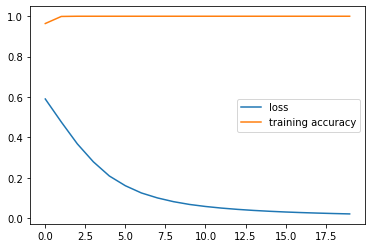

In [6]:
n_epochs = len(train_performance)
plt.plot(np.arange(n_epochs), [t[0] for t in train_performance], label='loss')
plt.plot(np.arange(n_epochs), [t[1] for t in train_performance], label='training accuracy')
plt.legend()

Wenn die Leistung eines Vorhersagemodells für maschinelles Lernen bewertet wird, ist es in der Regel wenig sinnvoll, dies auf den Trainingsdaten zu tun, da wir dann nicht wissen, ob das Modell die Lösung für die bereitgestellten Datenpunkte "auswendig" gelernt hat oder ob es wirklich verallgemeinerbare Regeln gefunden hat, die auch auf unbekannte Datenpunkte anwendbar sind. Daher ist es gängige Praxis, die endgültige (aber auch zwischenzeitliche) Leistung des Modells an zuvor nicht gesehenen Testdaten zu evaluieren. Zu diesem Zweck erzeugt einen neuen Datensatz (mit derselben Verteilung/demselben Typ) wie zuvor und testet euer Modell damit. Vergleicht Sie die (endgültige) Testleistung des Modells im gegebenen Zustand mit der (endgültigen) Trainingsleistung. Es könnte sinnvoll sein, dies mit einem Modell mit besserer Leistung (als nur einem linearen Klassifizierer) zu evaluieren.

Sobald ihr dies erfolgreich getan habt, fügt den Code für die wiederholte Schätzung der Testleistung in die vorherige Trainingsschleife ein.


In [7]:
Xtest, Ytest , _ = generate_dataset(name=datensatz, N=n_data*10, random_seed=seed + 123124) #we use another seed to make sure to NOT generate the same samples as before. also, more data, but same distribution = dataset name

# compute loss and classification accuracy
te_l2_loss = np.mean(np.sqrt(np.sum((y_pred - Y)**2, axis=1)))  #try out alternative loss computations. this is for now the euclidean distance between predicted output and expected output per sample, averaged over all samples
te_acc = np.mean(np.argmax(y_pred, axis=1) == np.argmax(Y, axis=1)) # accuracy = average (ie mean) "hit" probability of predicting the correct class
    
print('Test Performance:  Loss {:.6f}, Acc {:.2f}%'.format(e, te_l2_loss, te_acc*100))

Test Performance:  Loss 19.000000, Acc 0.02%


# Visualisierung der erlernten Entscheidungslinie

Um weitere Einblicke zu erhalten, wie sich unser trainiertes Modell auf allen möglichen unbekannten Daten verhält -- nicht nur auf dem extra generierte Testdatensatz -- gibt es die funktion `data_eval`, mit der wir den Inputspace dicht abstecken und auswerten können.

Macht euch mit der Funktion vertraut und generiert einen Evaluierungsdatensatz, den ihr mit dem Modell auswertet.
Nutzt anschließend die Hilfsfunktionen in diesem codeblock, um die Entscheidungslinie des Modells zu visualisieren.





In [8]:
# Some analysis helper functions

def analyze_decision_boundary(neuralnet, Xtrain, Ytrain, Xeval, gridcoords, canvas_buffer):
    # predict evaluation data with neural net
    Yeval = neuralnet.forward(Xeval)
    
    predictions = np.argmax(Yeval, axis=1)
    levels = np.arange(Yeval.shape[1])
    XX, YY = gridcoords
    # bring predictions to grid shape
    predictions = np.argmax(Yeval, axis=1)
    predictions = np.reshape(predictions, XX.shape)
      

    display.display(plt.gcf())
    display.clear_output(wait=True)
    fig = plt.figure(plt.gcf())

        
    # render grid evaluation
    plt.contourf(XX, YY, predictions, alpha=0.5)
    plt.contour(XX, YY, predictions)
    plt.scatter(Xtrain[:,0], Xtrain[:,1], c=np.argmax(Ytrain, axis=1))
        
    # plot data
    plt.axis('equal')
    plt.show()
    
    # collect figure canvas for later processing 
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    canvas_buffer.append(image)
    

# can be used to save visualizations
def save_visualizations(output_dir, canvas_buffer, fps=1.0):
    print('Saving as animated gif to {} ...'.format(output_dir))
    imageio.mimsave('{}/animation.gif'.format(output_dir), canvas_buffer, fps=fps)
    print('Saving individual PNGs to {} ...'.format(output_dir))
    output_dir += '/frames'
    if not os.path.isdir(output_dir):
        os.makedirs(output_dir)
    for i, frame in enumerate(canvas_buffer):
        imageio.imwrite('{}/epoch-{}.png'.format(output_dir, i), frame)


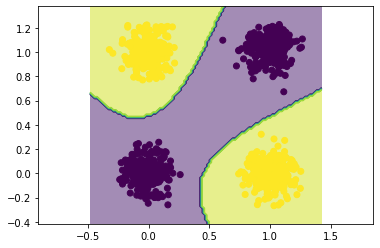

In [9]:
X_eval, coordinates = data_eval(X)
analyze_decision_boundary(nn, X, Y, X_eval, coordinates, [])

Baut nun die visualisierung der Entscheidungslinie in den Trainingsloop weiter oben ein und beobachtet, wie sich das Model (und somit die Entscheidungslinine) im Laufe des trainings auf die Daten anpasst!

# Bonusaufgabe:

Ihr wisst nun, wie man ML-Modelle auf diversen Datensätzen optimiert und evaluiert. Programmiert nun eine rigorose Auswertung einer Reihe von Modellen (durchforstet gern auch `sklearn`) über die euch zur verfügung stehenden Datensätze und und vergleich deren Performance.

Legt zb. eine Liste von Modellen an, die ihr evaluieren wollt, und eine Liste von Datensätzen. Trainiert jedes Modell auf jedem Datensatz und messt die Performance auf den Trainings- aber auch auf den Testdaten.

Visualisiert am ende die Ergebnisse, zb in einer Tabelle oder einem scatter plot, oder wie es euch am besten passt, um herauszufinden, welches Modell in welchem Setting zu bevorzugen wäre. Stellt Hypothesen auf und diskutiert diese, wieso ihr zu euren Schlüssen und Ergebnissen kommt.

Um euch Zeit beim debugging und training zu sparen, nutzt die `read` und `write` funktionen im modul `model_io`, um NNs abzuspeichern und zu laden, vorzugsweise im plain text format (`fmt="txt"`) um einen menschenlesbaren Output zu erhalten.